# Prediction of customer churn for the bank.

Customers have been leaving "Beta-Bank" every month, albeit in small numbers. The bank's marketers calculated that it was cheaper to retain existing customers than to attract new ones. 

We need to predict whether a customer will leave the bank in the near future or not. We have been provided with historical data on customer behavior and contract termination with the bank. 

We will build a model with a maximum F1 score. We need to bring the metric to 0.59. Additionally, measure the AUC-ROC and compare its value to the F1 score. 

Data source: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling.

## Contents:
1. Reviewing of the data and preprocessing. 
2. Training models.
3. Balancing of data.
4. Testing models.
5. Overall conclusion.

## Description of data:

### Features:
* RowNumber - index of row in data
* CustomerId - unique customer identifier
* Surname - surname
* CreditScore - credit rating
* Geography - country of residence
* Gender - gender
* Age - age
* Tenure - how many years the person has been a customer of the bank
* Balance - balance on the account
* NumOfProducts - number of bank products used by the customer
* HasCrCard - presence of a credit card
* IsActiveMember - customer activity
* EstimatedSalary - estimated salary

### Target feature:
* Exited - fact of customer leaving

## 1. Reviewing of the data and preprocessing.

Import the libraries and tools.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve, accuracy_score, mean_squared_error

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import math

In [2]:
pd.set_option('display.max_columns', 50)
pd.options.display.float_format = '{:,.2f}'.format

Open the dataset.

In [3]:
url = 'https://code.s3.yandex.net/datasets/Churn.csv'
data = pd.read_csv(url)

Look at it.

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,"10,000.00","10,000.00","10,000.00","10,000.00","9,091.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"5,000.50","15,690,940.57",650.53,38.92,5.00,"76,485.89",1.53,0.71,0.52,"100,090.24",0.20
std,"2,886.90","71,936.19",96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,510.49",0.40
min,1.00,"15,565,701.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"2,500.75","15,628,528.25",584.00,32.00,2.00,0.00,1.00,0.00,0.00,"51,002.11",0.00
50%,"5,000.50","15,690,738.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.91",0.00
75%,"7,500.25","15,753,233.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,"10,000.00","15,815,690.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


Look for duplicates.

In [7]:
print('Number of duplicates:', data.duplicated().sum())

Number of duplicates: 0


As we can see, the column names contain letters in uppercase - let's fix that.-

In [8]:
data.columns = data.columns.str.lower()

In [9]:
data.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


Look at the number of missing values in the tenure column.

In [10]:
print('Number NaN in tenure', data['tenure'].isna().sum(),
      ', % NaN in tenure:', round(data['tenure'].isna().sum()/len(data)*100, 2),'%')

Number NaN in tenure 909 , % NaN in tenure: 9.09 %


We see that the amount of missing data is 9%, and it is not possible to fill in the missing data with mean and median values, as this would be an intentional distortion of the data (garbage in, garbage out). Let's remove this data and bring it to whole values.

In [11]:
data = data.dropna(subset=['tenure'])
data.reset_index(drop=True).head()
data['tenure'] = data['tenure'].astype(int)

<ipython-input-11-040f23a3f53a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tenure'] = data['tenure'].astype(int)


We see that the rownumber column contains the order number and does not carry any information, so let's remove this column.

In [12]:
data = data.drop(['rownumber'], axis=1)

Look for errors in the categorical data.

In [13]:
temp = data.copy() 
list_c = ['surname', 'geography', 'gender']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': numbers of NaN',temp[col_l].isna().sum(),
        ', % NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       9091 non-null   int64  
 1   surname          9091 non-null   object 
 2   creditscore      9091 non-null   int64  
 3   geography        9091 non-null   object 
 4   gender           9091 non-null   object 
 5   age              9091 non-null   int64  
 6   tenure           9091 non-null   int64  
 7   balance          9091 non-null   float64
 8   numofproducts    9091 non-null   int64  
 9   hascrcard        9091 non-null   int64  
 10  isactivemember   9091 non-null   int64  
 11  estimatedsalary  9091 non-null   float64
 12  exited           9091 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 994.3+ KB
None
-------------------------
surname ['Abazu' 'Abbie' 'Abbott' ... 'Zuev' 'Zuyev' 'Zuyeva']
surname : numbers of NaN 0 , % NaN 0.0 %
----

Remove the columns with customerid and surname, which are personalized categorical data and will have a negative impact on the model training and its accuracy.

In [14]:
data = data.drop(['customerid','surname'], axis=1)

Use the direct coding technique to convert categorical features to numerical.

In [15]:
data = pd.get_dummies(data, drop_first=True)
data.columns = data.columns.str.lower()

Look at the data distribution.

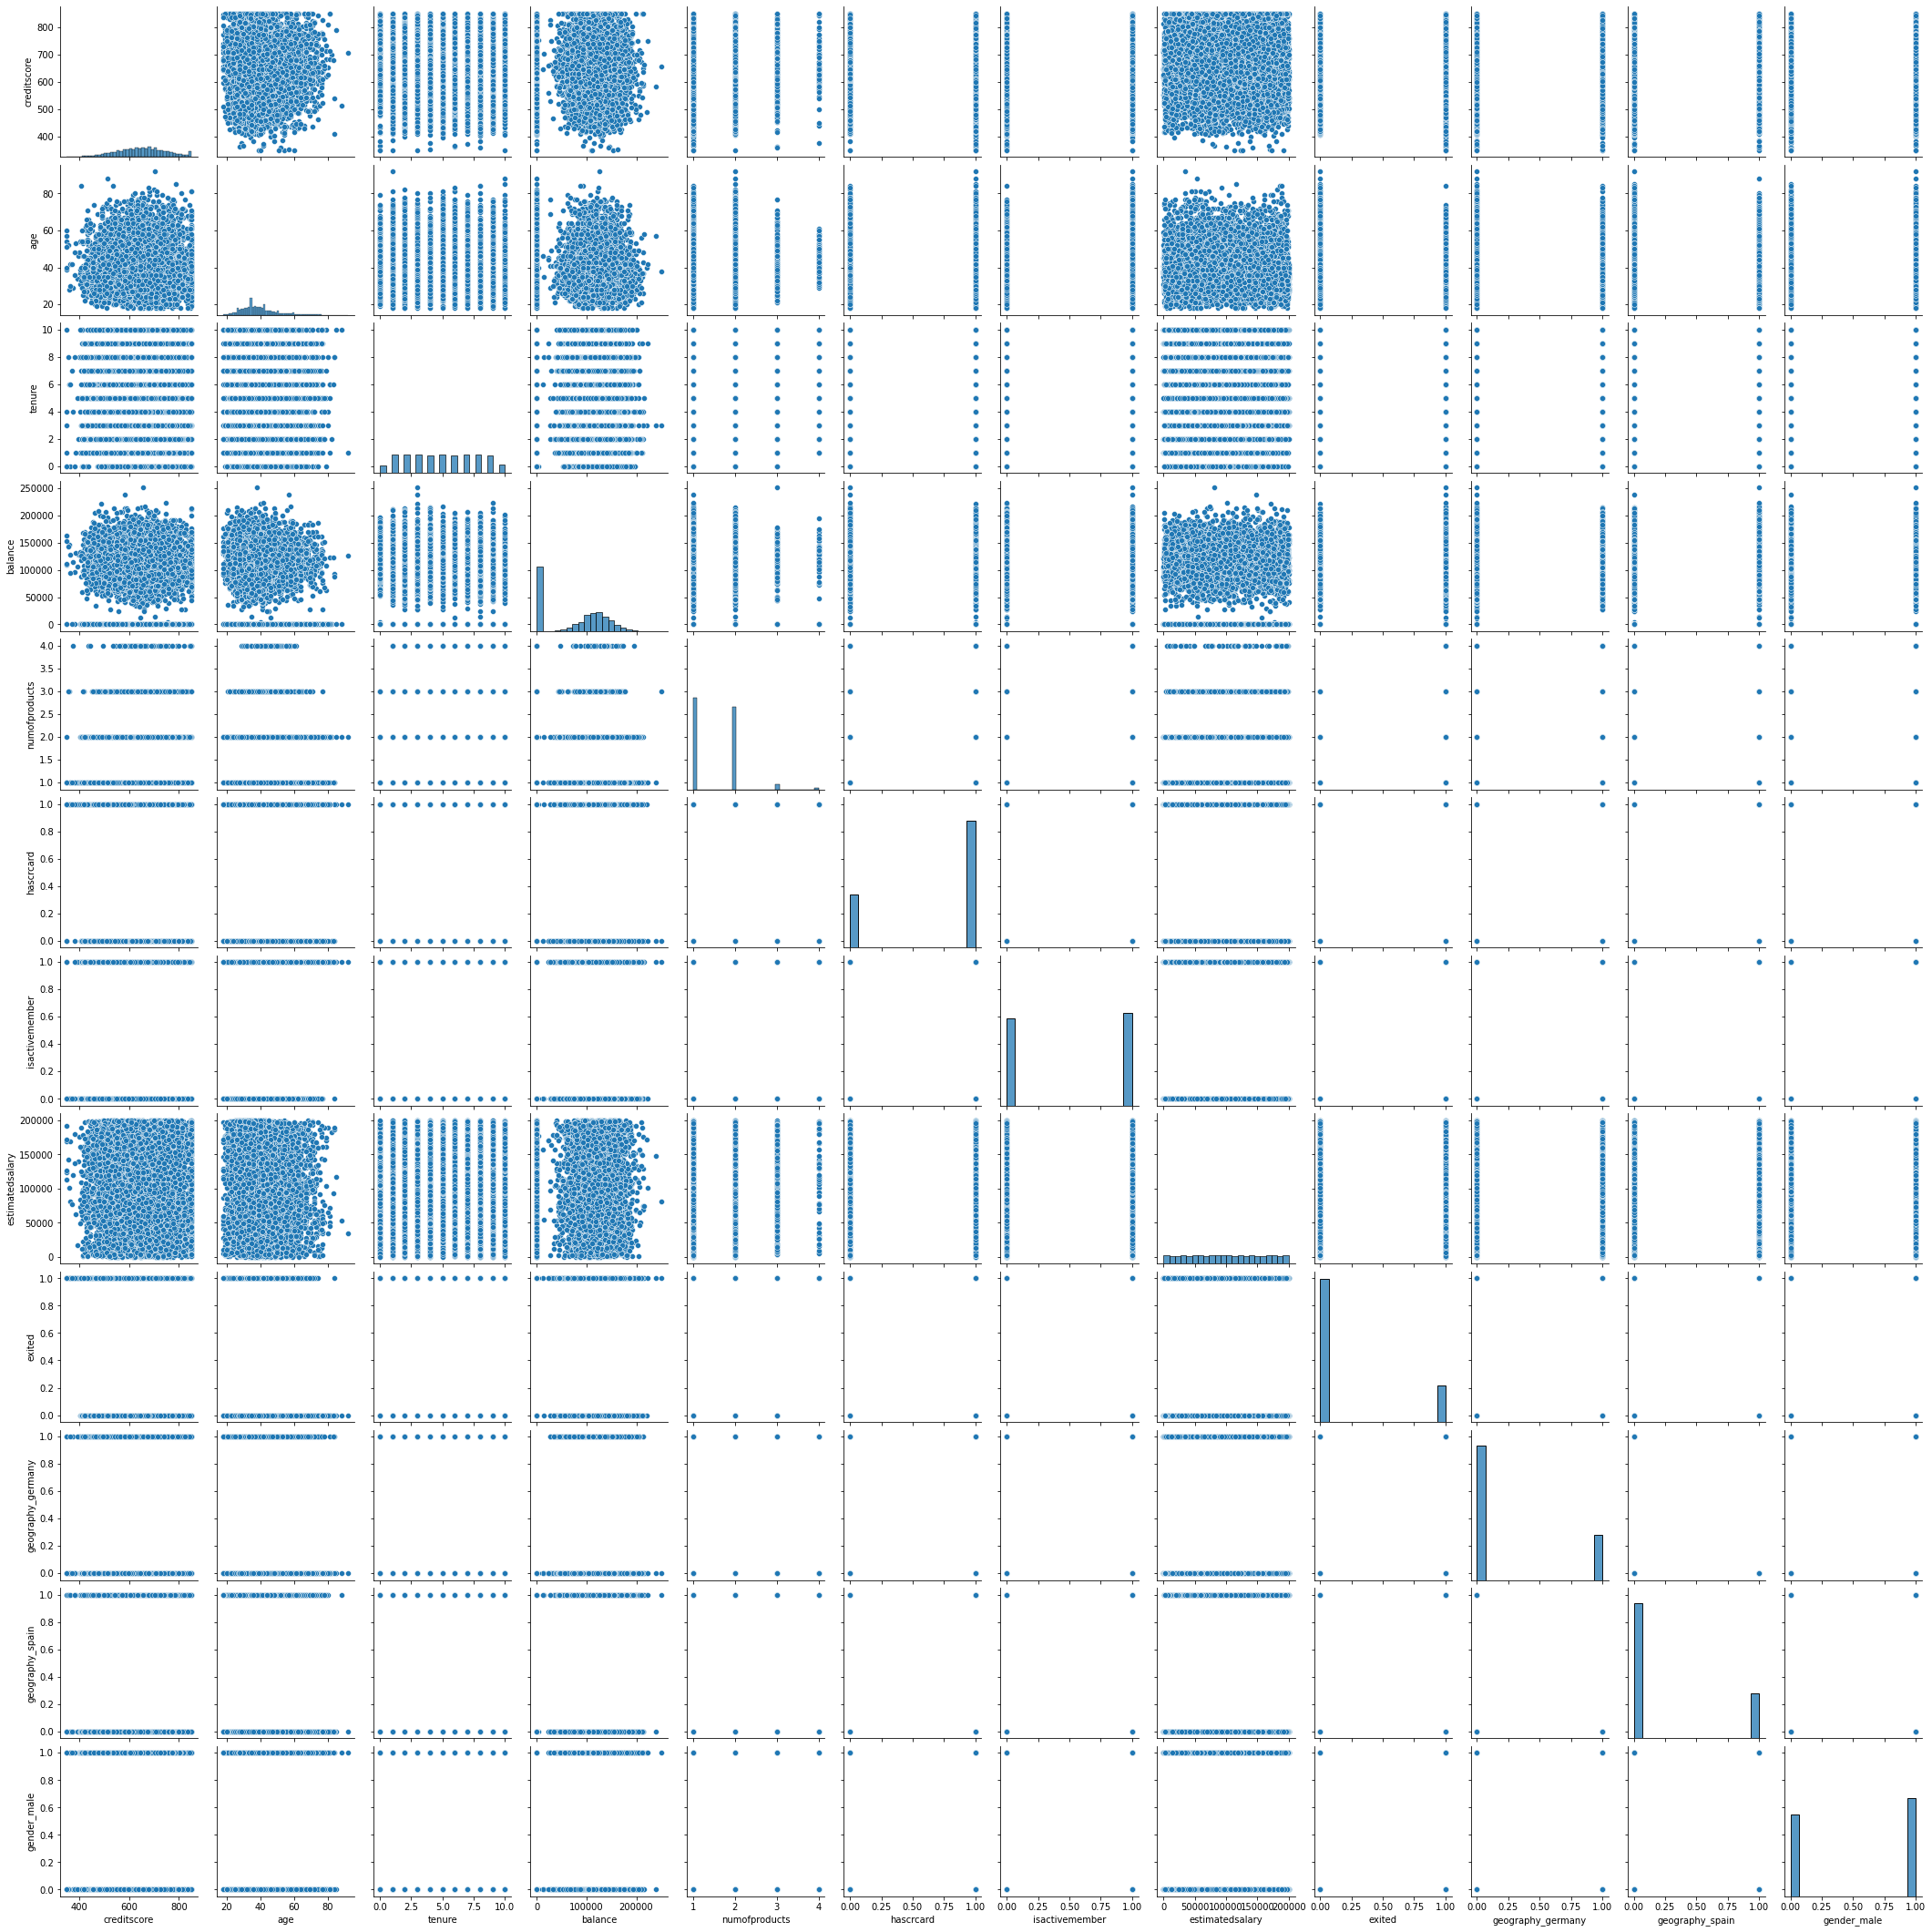

In [16]:
sns.pairplot(data)
plt.show()

Look at the possible dependencies of the data through the heatmap.

Text(0.5, 1.0, 'Heatmap of data dependencies')

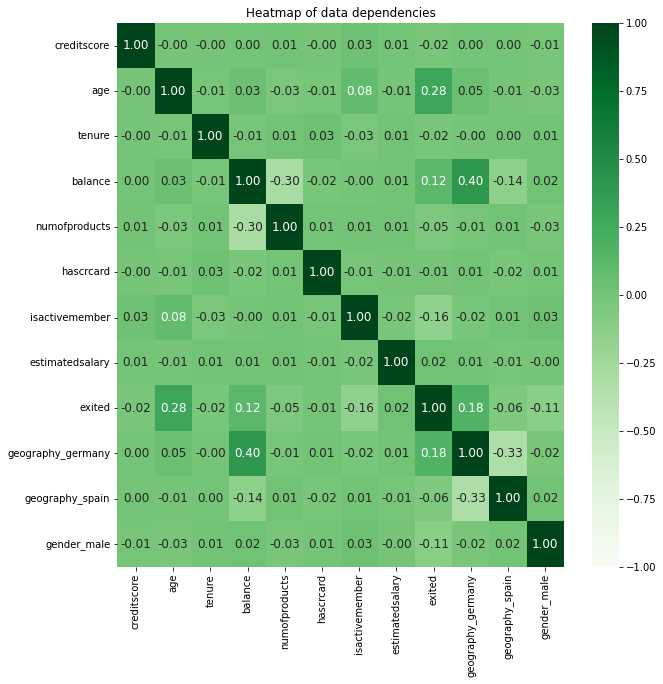

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), 
            annot=True, 
            cmap='Greens', 
            fmt='.2f', 
            annot_kws={'size':12}, 
            vmin=-1, 
            vmax=1, 
            center=0)
plt.title('Heatmap of data dependencies')

As we can see, there are no close dependencies.

Conclusion: 

From the data overview and preprocessing, we can see the following:
* A dataset of 14x10000 is provided for data analysis;
* Column names in upper case are converted to lower case;
* Missing data in the tenure column is identified, as it is impossible to fill in the missing data - the data is removed and then converted to an integer form;
* Duplicates, errors and anomalies in the data are not identified;
* The rownumber column containing the ordinal numbers is removed;
* The customerid and surname columns containing personalized categorical data are removed;
* Based on the correlation matrix and heatmap of correlation coefficients, no strong correlation between the data is identified that could negatively affect the accuracy of the models.

## 2. Training models.

Let's identify the features and target features.

In [18]:
features = data.drop(['exited'], axis=1)
target = data['exited']

We will split the dataframe into samples.

In [19]:
features_train, features_part, target_train, target_part = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.40, 
                                                                            random_state=12345, 
                                                                            stratify=target)

features_valid, features_test, target_valid, target_test = train_test_split(features_part, 
                                                                            target_part, 
                                                                            test_size=0.5, 
                                                                            random_state=12345, 
                                                                            stratify=target_part)

Let's look on their size.

In [20]:
print('features_train',features_train.shape, 
      'features_valid',features_valid.shape, 
      'features_test',features_test.shape, 
      'target_train',target_train.shape,  
      'target_valid',target_valid.shape, 
      'target_test',target_test.shape)

features_train (5454, 11) features_valid (1818, 11) features_test (1819, 11) target_train (5454,) target_valid (1818,) target_test (1819,)


Before we start modelling, we need to center and standardize the data by scaling them.

In [21]:
data.head(3)

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_germany,geography_spain,gender_male
0,619,42,2,0.00,1,1,1,"101,348.88",1,0,0,0
1,608,41,1,"83,807.86",1,0,1,"112,542.58",0,0,1,0
2,502,42,8,"159,660.80",3,1,0,"113,931.57",1,0,0,0


In [22]:
numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']

scaler = StandardScaler()

scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

We will determine the combination of optimal hyperparameters using RandomizedSearchCV.

We will train the decision tree model.

In [23]:
model_dtc = DecisionTreeClassifier(random_state=12345)

model_dtc.fit(features_train, target_train)

prediction_dtc = pd.Series(model_dtc.predict(features_valid))
probabilities_valid = model_dtc.predict_proba(features_valid)[:, 1]

In [24]:
print('Accuracy', round(accuracy_score(target_valid, prediction_dtc),4))
print('Precision', round(precision_score(target_valid, prediction_dtc),4))
print('Recall', round(recall_score(target_valid, prediction_dtc),4))
print('F1', round(f1_score(target_valid, prediction_dtc),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Accuracy 0.791
Precision 0.4881
Recall 0.496
F1 0.492
AUC-ROC 0.6813


We will select the optimal combination of hyperparameters and look at the model metrics.

In [25]:
splitter = ['best', 'random']
max_features = ['log2', 'sqrt', 'auto']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 100)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50)]

param_dist = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rs = RandomizedSearchCV(model_dtc, 
                        param_dist, 
                        random_state=12345)

rs.fit(features_train, target_train)

best_model_dtc = DecisionTreeClassifier(random_state=12345, 
                                        **rs.best_params_)

best_model_dtc.fit(features_train, target_train)

prediction_dtc = pd.Series(best_model_dtc.predict(features_valid))
probabilities_valid = best_model_dtc.predict_proba(features_valid)[:, 1]
fpr_dtc_nb, tpr_dtc_nb, thresholds = roc_curve(target_valid, probabilities_valid)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.8

In [26]:
print('Optimal combination of hyperparameters:',rs.best_params_)
print('Accuracy', round(accuracy_score(target_valid, prediction_dtc),4))
print('Precision', round(precision_score(target_valid, prediction_dtc),4))
print('Recall', round(recall_score(target_valid, prediction_dtc),4))
print('F1', round(f1_score(target_valid, prediction_dtc),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Optimal combination of hyperparameters: {'splitter': 'best', 'min_samples_split': 50, 'min_samples_leaf': 14, 'max_features': 'auto', 'max_depth': 11}
Accuracy 0.8421
Precision 0.6628
Recall 0.4609
F1 0.5437
AUC-ROC 0.8217


We will train the random forest model.

In [27]:
model_rfc = RandomForestClassifier(random_state=12345)

model_rfc.fit(features_train, target_train)

prediction_rfc = pd.Series(model_rfc.predict(features_valid))
probabilities_valid = model_rfc.predict_proba(features_valid)[:, 1]

In [28]:
print('Accuracy', round(accuracy_score(target_valid, prediction_rfc),4))
print('Precision', round(precision_score(target_valid, prediction_rfc),4))
print('Recall', round(recall_score(target_valid, prediction_rfc),4))
print('F1', round(f1_score(target_valid, prediction_rfc),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Accuracy 0.8641
Precision 0.7583
Recall 0.4906
F1 0.5957
AUC-ROC 0.8699


We will select the optimal combination of hyperparameters and look at the model metrics.

In [29]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 300, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 100)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50)]
bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rs = RandomizedSearchCV(model_rfc, 
                        param_dist, 
                        random_state=12345)

rs.fit(features_train, target_train)

best_model_rfc = RandomForestClassifier(random_state=12345, 
                                        **rs.best_params_)

best_model_rfc.fit(features_train, target_train)

prediction_rfc = pd.Series(best_model_rfc.predict(features_valid))
probabilities_valid = best_model_rfc.predict_proba(features_valid)[:, 1]
fpr_rfc_nb, tpr_rfc_nb, thresholds = roc_curve(target_valid, probabilities_valid)

In [30]:
print('Optimal combination of hyperparameters:',rs.best_params_)
print('Accuracy', round(accuracy_score(target_valid, prediction_rfc),4))
print('Precision', round(precision_score(target_valid, prediction_rfc),4))
print('Recall', round(recall_score(target_valid, prediction_rfc),4))
print('F1', round(f1_score(target_valid, prediction_rfc),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Optimal combination of hyperparameters: {'n_estimators': 133, 'min_samples_split': 38, 'min_samples_leaf': 12, 'max_features': 'log2', 'max_depth': 43, 'bootstrap': False}
Accuracy 0.8696
Precision 0.8131
Recall 0.469
F1 0.5949
AUC-ROC 0.8811


We will train the logistic regression model.

In [31]:
model_lr =  LogisticRegression(random_state=12345)

model_lr.fit(features_train, target_train)

prediction_lr = pd.Series(model_lr.predict(features_valid))
probabilities_valid = model_lr.predict_proba(features_valid)[:, 1]

In [32]:
print('Accuracy', round(accuracy_score(target_valid, prediction_lr),4))
print('Precision', round(precision_score(target_valid, prediction_lr),4))
print('Recall', round(recall_score(target_valid, prediction_lr),4))
print('F1', round(f1_score(target_valid, prediction_lr),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Accuracy 0.8152
Precision 0.6336
Recall 0.2237
F1 0.3307
AUC-ROC 0.7893


In [33]:
best_model_lr =  LogisticRegression(random_state=12345, 
                                    penalty = 'l1', 
                                    solver = 'liblinear')

model_lr.fit(features_train, target_train)

predicted_valid_forest = pd.Series(model_lr.predict(features_valid))
probabilities_valid = model_lr.predict_proba(features_valid)[:, 1]
fpr_lr_nb, tpr_lr_nb, thresholds = roc_curve(target_valid, probabilities_valid)

In [34]:
print('Accuracy', round(accuracy_score(target_valid, prediction_lr),4))
print('Precision', round(precision_score(target_valid, prediction_lr),4))
print('Recall', round(recall_score(target_valid, prediction_lr),4))
print('F1', round(f1_score(target_valid, prediction_lr),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Accuracy 0.8152
Precision 0.6336
Recall 0.2237
F1 0.3307
AUC-ROC 0.7893


Model metrics on unbalanced data.

|Metric|Decision Tree, before/after|Random Forest, before/after|Logistic Regression, before/after|
|:-|:-:|:-:|:-:|
|Accuracy |0,791 / 0,8421|0,8641 / 0,8696|0,8152 / 0,8152|
|Precision|0,4881 / 0,6628|0,7583 / 0,8131|0,6336 / 0,6336|
|Recall   |0,496 / 0,4609|0,4906 / 0,469|0,2237 / 0,2237|
|F1       |0,492 / 0,5437|0,5957 / 0,5949|0,3307 / 0,3307|
|AUC-ROC  |0,6813 / 0,8217|0,8699 / 0,8811|0,7893 / 0,7893|

before/after:
* Before - a model for selecting an optimal combination of hyperparameters.
* After - a model with an optimal combination of hyperparameters.

Let's visualize the AUC-ROC through an area graph.

<Figure size 432x288 with 0 Axes>

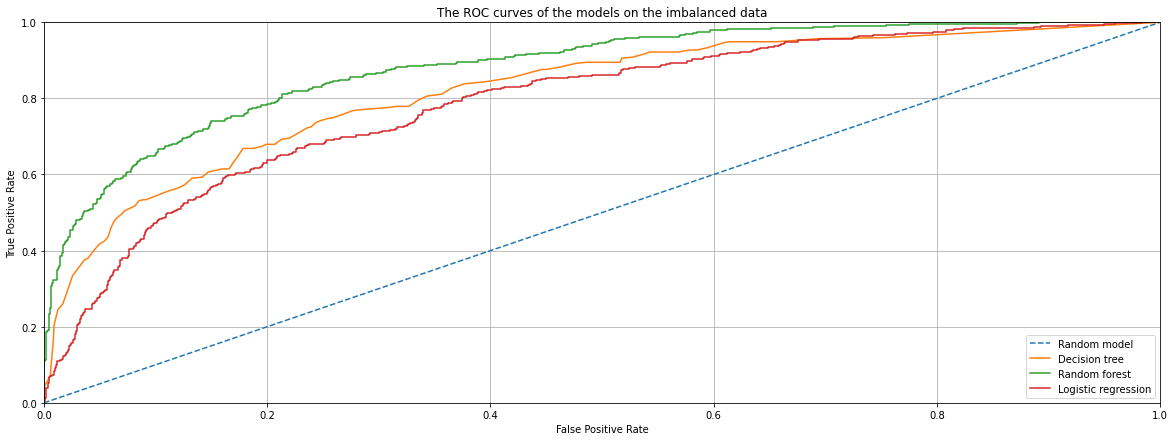

In [35]:
plt.figure()

plt.figure(figsize=(20,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_dtc_nb,tpr_dtc_nb)
plt.plot(fpr_rfc_nb,tpr_rfc_nb)
plt.plot(fpr_lr_nb,tpr_lr_nb)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The ROC curves of the models on the imbalanced data')
plt.legend(('Random model','Decision tree','Random forest','Logistic regression'),
           loc = 'lower right') 
plt.grid(True)
plt.show()

Conclusion: 

After finding the optimal combination of hyperparameters, the accuracy of the decision tree and random forest models improved. The metrics of the logistic regression model did not change. We also see that the most accurate model, which is close to the accuracy threshold of F1 = 0.59, is the random forest. We also see that due to the imbalance of the data, all models have a recall lower than precision, which affects the F-measure. From the graph we can see that the random forest model leads.

## 3. Balancing of data.

Let's look at the distribution of the target feature.

0   0.80
1   0.20
Name: exited, dtype: float64


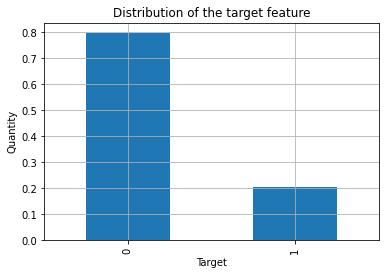

In [36]:
class_frequency = data['exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')
plt.title('Distribution of the target feature')
plt.ylabel('Quantity')
plt.xlabel('Target')
plt.grid(True)
plt.show()

We can see a 4-fold imbalance in the target feature data. We will retrain the models taking into account the balancing and look at the metrics.

#### We will fight the imbalance through the class_weight argument.

We will retrain the models with the parameter class_weight='balanced' and see how this method affects the metrics and the optimal combination of hyperparameters.

The model Decision tree.

In [37]:
model_dtc = DecisionTreeClassifier(random_state=12345, 
                                   class_weight='balanced')

model_dtc.fit(features_train, target_train)

prediction_dtc = pd.Series(model_dtc.predict(features_valid))
probabilities_valid = model_dtc.predict_proba(features_valid)[:, 1]

In [38]:
print('Accuracy', round(accuracy_score(target_valid, prediction_dtc),4))
print('Precision', round(precision_score(target_valid, prediction_dtc),4))
print('Recall', round(recall_score(target_valid, prediction_dtc),4))
print('F1', round(f1_score(target_valid, prediction_dtc),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Accuracy 0.802
Precision 0.5147
Recall 0.5175
F1 0.5161
AUC-ROC 0.6962


We will select the optimal combination of hyperparameters and look at the metrics of the model.

In [39]:
splitter = ['best', 'random']
max_features = ['log2', 'sqrt', 'auto']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 100)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50)]

param_dist = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rs = RandomizedSearchCV(model_dtc, 
                        param_dist, 
                        random_state=12345)

rs.fit(features_train, target_train)

best_model_dtc = DecisionTreeClassifier(random_state=12345, 
                                        class_weight='balanced', 
                                        **rs.best_params_)

best_model_dtc.fit(features_train, target_train)

prediction_dtc = pd.Series(best_model_dtc.predict(features_valid))
probabilities_valid = best_model_dtc.predict_proba(features_valid)[:, 1]
fpr_dtc_cw, tpr_dtc_cw, thresholds = roc_curve(target_valid, probabilities_valid)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.8

In [40]:
print('Optimal combination of hyperparameters:',rs.best_params_)
print('Accuracy', round(accuracy_score(target_valid, prediction_dtc),4))
print('Precision', round(precision_score(target_valid, prediction_dtc),4))
print('Recall', round(recall_score(target_valid, prediction_dtc),4))
print('F1', round(f1_score(target_valid, prediction_dtc),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Optimal combination of hyperparameters: {'splitter': 'best', 'min_samples_split': 50, 'min_samples_leaf': 14, 'max_features': 'auto', 'max_depth': 11}
Accuracy 0.7541
Precision 0.4356
Recall 0.6927
F1 0.5349
AUC-ROC 0.7961


The model is a random forest.

In [41]:
model_rfc = RandomForestClassifier(random_state=12345, 
                                   class_weight='balanced')

model_rfc.fit(features_train, target_train)

prediction_rfc = pd.Series(model_rfc.predict(features_valid))
probabilities_valid = model_rfc.predict_proba(features_valid)[:, 1]

In [42]:
print('Accuracy', round(accuracy_score(target_valid, prediction_rfc),4))
print('Precision', round(precision_score(target_valid, prediction_rfc),4))
print('Recall', round(recall_score(target_valid, prediction_rfc),4))
print('F1', round(f1_score(target_valid, prediction_rfc),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Accuracy 0.8619
Precision 0.7804
Recall 0.4501
F1 0.5709
AUC-ROC 0.8689


We will select the optimal combination of hyperparameters and look at the metrics of the model.

In [43]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 300)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 100)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50)]
bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rs = RandomizedSearchCV(model_rfc, 
                        param_dist, 
                        random_state=12345)

rs.fit(features_train, target_train)

best_model_rfc = RandomForestClassifier(random_state=12345, 
                                        class_weight='balanced', 
                                        **rs.best_params_)

best_model_rfc.fit(features_train, target_train)

prediction_rfc = pd.Series(best_model_rfc.predict(features_valid))
probabilities_valid = best_model_rfc.predict_proba(features_valid)[:, 1]
fpr_rfc_cw, tpr_rfc_cw, thresholds = roc_curve(target_valid, probabilities_valid)

In [44]:
print('Optimal combination of hyperparameters:',rs.best_params_)
print('Accuracy', round(accuracy_score(target_valid, prediction_rfc),4))
print('Precision', round(precision_score(target_valid, prediction_rfc),4))
print('Recall', round(recall_score(target_valid, prediction_rfc),4))
print('F1', round(f1_score(target_valid, prediction_rfc),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Optimal combination of hyperparameters: {'n_estimators': 251, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 97, 'bootstrap': False}
Accuracy 0.8421
Precision 0.5981
Recall 0.69
F1 0.6408
AUC-ROC 0.8749


The model is a logistic regression.

In [45]:
model_lr =  LogisticRegression(random_state=12345, 
                               class_weight='balanced')

model_lr.fit(features_train, target_train)

prediction_lr = pd.Series(model_lr.predict(features_valid))
probabilities_valid = model_lr.predict_proba(features_valid)[:, 1]

In [46]:
print('Accuracy', round(accuracy_score(target_valid, prediction_lr),4))
print('Precision', round(precision_score(target_valid, prediction_lr),4))
print('Recall', round(recall_score(target_valid, prediction_lr),4))
print('F1', round(f1_score(target_valid, prediction_lr),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Accuracy 0.7101
Precision 0.3886
Recall 0.7332
F1 0.5079
AUC-ROC 0.7907


In [87]:
model_lr =  LogisticRegression(random_state=12345, 
                               penalty = 'l2', 
                               solver = 'liblinear', 
                               class_weight='balanced')

model_lr.fit(features_train, target_train)

prediction_lr = pd.Series(model_lr.predict(features_valid))
probabilities_valid = model_lr.predict_proba(features_valid)[:, 1]
fpr_lr_cw, tpr_lr_cw, thresholds = roc_curve(target_valid, probabilities_valid)

print('Accuracy', round(accuracy_score(target_valid, prediction_lr),4))
print('Precision', round(precision_score(target_valid, prediction_lr),4))
print('Recall', round(recall_score(target_valid, prediction_lr),4))
print('F1', round(f1_score(target_valid, prediction_lr),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Accuracy 0.714
Precision 0.3919
Recall 0.7278
F1 0.5094
AUC-ROC 0.7913


Let's look at the results of the metrics after balancing the data.

Metrics of models after data balancing through the class_weight parameter.

|Metric|Decision Tree, before/after|Random Forest, before/after|Logistic Regression, before/after|
|:-|:-:|:-:|:-:|
|Accuracy |0,802 / 0,7541|0,8619 / 0,8421|0,7101 / 0,714|
|Precision|0,5141 / 0,4356|0,7804 / 0,5981|0,3886 / 0,3919|
|Recall   |0,5175 / 0,6927|0,4501 / 0,69|0,7332 / 0,7278|
|F1       |0,5161 / 0,5349|0,5709 / 0,6408|0,5079 / 0,5094|
|AUC-ROC  |0,6962 / 0,7961|0,8689 / 0,8749|0,7907 / 0,7913|

before/after:
* Before - the model before selecting the optimal combination of hyperparameters. 
* After - the model on the optimal combination of hyperparameters.

We will visualize the AUC-ROC through the area graph.

<Figure size 432x288 with 0 Axes>

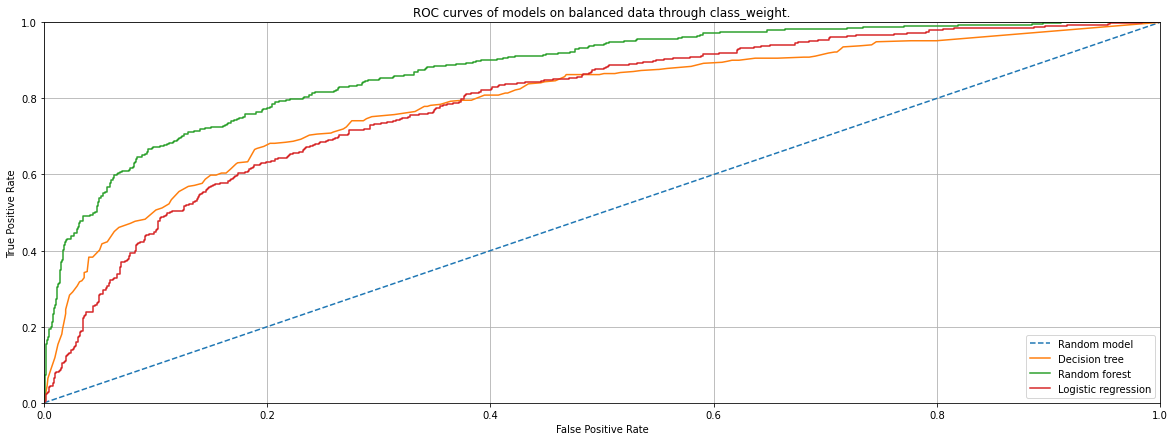

In [49]:
plt.figure()

plt.figure(figsize=(20,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_dtc_cw,tpr_dtc_cw)
plt.plot(fpr_rfc_cw,tpr_rfc_cw)
plt.plot(fpr_lr_cw,tpr_lr_cw)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of models on balanced data through class_weight.')
plt.legend(('Random model','Decision tree','Random forest','Logistic regression'),
           loc = 'lower right') 
plt.grid(True)
plt.show()

Conclusion: 

As we can see, the leader among the models remains the random forest with f1, which, due to the balance of the data, increased from 0.5949 to 0.6408. For the logistic regression model, the hyperparameter search did not affect the metrics, but the balancing was beneficial, increasing f1 from 0.3307 to 0.5079. We also see that the decision tree model shows a decrease in f1 from 0.5437 to 0.5349, and accuracy decreased from 0.8421 to 0.7541. From the graph we can see that the leader is the random forest model.

#### We will fight the imbalance through downsampling.

We will write a function and train a model without an optimal combination of hyperparameters.

In [50]:
def downsample(features, target, fraction):

    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

The model Decision tree.

In [51]:
model_dtc = DecisionTreeClassifier(random_state=12345)

model_dtc.fit(features_downsampled, target_downsampled)

prediction_dtc = pd.Series(model_dtc.predict(features_valid))
probabilities_valid = model_dtc.predict_proba(features_valid)[:, 1]

In [52]:
print('Accuracy', round(accuracy_score(target_valid, prediction_dtc),4))
print('Precision', round(precision_score(target_valid, prediction_dtc),4))
print('Recall', round(recall_score(target_valid, prediction_dtc),4))
print('F1', round(f1_score(target_valid, prediction_dtc),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Accuracy 0.6012
Precision 0.3164
Recall 0.8221
F1 0.4569
AUC-ROC 0.6833


We will select the optimal combination of hyperparameters and look at the metrics of the model.

In [53]:
splitter = ['best', 'random']
max_features = ['log2', 'sqrt', 'auto']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 100)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50)]

param_dist = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rs = RandomizedSearchCV(model_dtc, 
                        param_dist, 
                        random_state=12345)

rs.fit(features_downsampled, target_downsampled)

best_model_dtc = DecisionTreeClassifier(random_state=12345, 
                                        **rs.best_params_)

best_model_dtc.fit(features_downsampled, target_downsampled)

prediction_dtc = pd.Series(best_model_dtc.predict(features_valid))
probabilities_valid = best_model_dtc.predict_proba(features_valid)[:, 1]
fpr_dtc_ds, tpr_dtc_ds, thresholds = roc_curve(target_valid, probabilities_valid)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.8

In [54]:
print('Optimal combination of hyperparameters:',rs.best_params_)
print('Accuracy', round(accuracy_score(target_valid, prediction_dtc),4))
print('Precision', round(precision_score(target_valid, prediction_dtc),4))
print('Recall', round(recall_score(target_valid, prediction_dtc),4))
print('F1', round(f1_score(target_valid, prediction_dtc),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Optimal combination of hyperparameters: {'splitter': 'random', 'min_samples_split': 47, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 53}
Accuracy 0.489
Precision 0.2732
Recall 0.9057
F1 0.4197
AUC-ROC 0.7988


The model Random Forest.

In [55]:
model_rfc = RandomForestClassifier(random_state=12345)

model_rfc.fit(features_downsampled, target_downsampled)
prediction_rfc = pd.Series(model_rfc.predict(features_valid))
probabilities_valid = model_rfc.predict_proba(features_valid)[:, 1]

In [56]:
print('Accuracy', round(accuracy_score(target_valid, prediction_rfc),4))
print('Precision', round(precision_score(target_valid, prediction_rfc),4))
print('Recall', round(recall_score(target_valid, prediction_rfc),4))
print('F1', round(f1_score(target_valid, prediction_rfc),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Accuracy 0.5913
Precision 0.3245
Recall 0.9272
F1 0.4808
AUC-ROC 0.8572


We will select the optimal combination of hyperparameters and look at the metrics of the model.

In [57]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 300)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 100)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50)]
bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rs = RandomizedSearchCV(model_rfc, 
                        param_dist, 
                        random_state=12345)

rs.fit(features_downsampled, target_downsampled)

best_model_rfc = RandomForestClassifier(random_state=12345, 
                                        **rs.best_params_)

best_model_rfc.fit(features_downsampled, target_downsampled)

prediction_rfc = pd.Series(best_model_rfc.predict(features_valid))
probabilities_valid = best_model_rfc.predict_proba(features_valid)[:, 1]
fpr_rfc_ds, tpr_rfc_ds, thresholds = roc_curve(target_valid, probabilities_valid)

In [58]:
print('Optimal combination of hyperparameters:',rs.best_params_)
print('Accuracy', round(accuracy_score(target_valid, prediction_rfc),4))
print('Precision', round(precision_score(target_valid, prediction_rfc),4))
print('Recall', round(recall_score(target_valid, prediction_rfc),4))
print('F1', round(f1_score(target_valid, prediction_rfc),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Optimal combination of hyperparameters: {'n_estimators': 251, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 97, 'bootstrap': False}
Accuracy 0.5759
Precision 0.3179
Recall 0.9407
F1 0.4752
AUC-ROC 0.8601


The model Logistic regression.

In [59]:
model_lr =  LogisticRegression(random_state=12345)

model_lr.fit(features_downsampled, target_downsampled)

prediction_lr = pd.Series(model_lr.predict(features_valid))
probabilities_valid = model_lr.predict_proba(features_valid)[:, 1]

In [60]:
print('Accuracy', round(accuracy_score(target_valid, prediction_lr),4))
print('Precision', round(precision_score(target_valid, prediction_lr),4))
print('Recall', round(recall_score(target_valid, prediction_lr),4))
print('F1', round(f1_score(target_valid, prediction_lr),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Accuracy 0.4741
Precision 0.2727
Recall 0.9461
F1 0.4234
AUC-ROC 0.79


We will look at the metrics with the refined hyperparameters.

In [61]:
model_lr =  LogisticRegression(random_state=12345, 
                               penalty = 'l2', 
                               solver = 'liblinear' )

model_lr.fit(features_downsampled, target_downsampled)

prediction_lr = pd.Series(model_lr.predict(features_valid))
probabilities_valid = model_lr.predict_proba(features_valid)[:, 1]
fpr_lr_ds, tpr_lr_ds, thresholds = roc_curve(target_valid, probabilities_valid)

In [62]:
print('Accuracy', round(accuracy_score(target_valid, prediction_lr),4))
print('Precision', round(precision_score(target_valid, prediction_lr),4))
print('Recall', round(recall_score(target_valid, prediction_lr),4))
print('F1', round(f1_score(target_valid, prediction_lr),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Accuracy 0.4747
Precision 0.2729
Recall 0.9461
F1 0.4237
AUC-ROC 0.79


The metrics of the models when Downsampling.

|Metric|Decision Tree, before/after|Random Forest, before/after|Logistic Regression, before/after|
|:-|:-:|:-:|:-:|
|Accuracy |0,6012 / 0,489|0,5913 / 0,5759|0,4741 / 0,4747|
|Precision|0,3164 / 0,2732|0,3245 / 0,3179|0,2727 / 0,2729|
|Recall   |0,8221 / 0,9057|0,9272 / 0,9407|0,9461 / 0,9461|
|F1       |0,4569 / 0,4197|0,4808 / 0,4752|0,4234 / 0,4237|
|AUC-ROC  |0,6833 / 0,7988|0,8572 / 0,8601|0,79 / 0,79|

before/after:
* Before: the model before finding the optimal combination of hyperparameters.
* After: the model on the optimal combination of hyperparameters.

Conclusion: 

As we can see, this method is not useful for the model, the data clearly show a deterioration in metrics.

We will visualize the AUC-ROC through the area graph.

<Figure size 432x288 with 0 Axes>

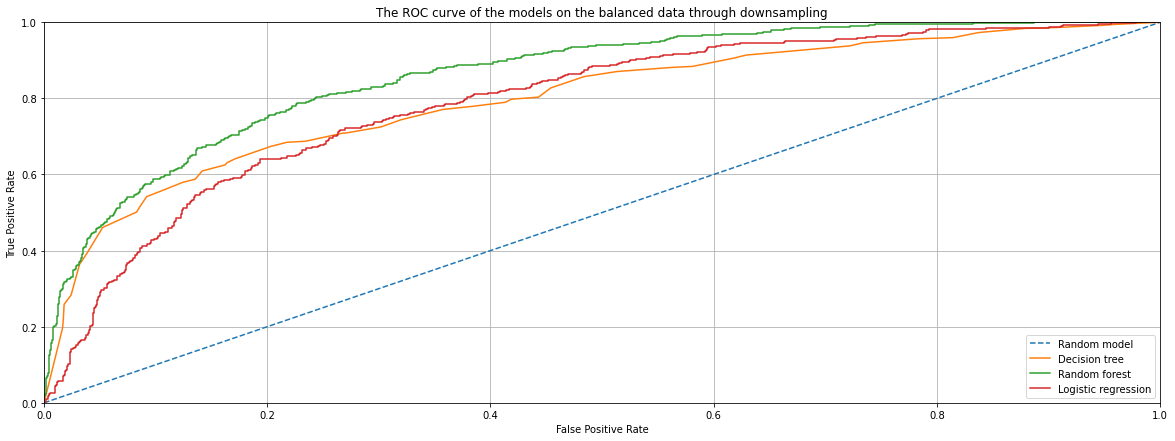

In [63]:
plt.figure()

plt.figure(figsize=(20,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_dtc_ds,tpr_dtc_ds)
plt.plot(fpr_rfc_ds,tpr_rfc_ds)
plt.plot(fpr_lr_ds,tpr_lr_ds)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The ROC curve of the models on the balanced data through downsampling')
plt.legend(('Random model','Decision tree','Random forest','Logistic regression'),
           loc = 'lower right') 
plt.grid(True)
plt.show()

Conclusion: 

From the graph we can see that the random forest model leads.

#### We will combat the imbalance through upsampling.

We will write a function and train a model without an optimal combination of hyperparameters.

In [64]:
def upsample(features, target, repeat):

    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]

    repeat = 10
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled  = shuffle(features_upsampled, 
                                                    target_upsampled , 
                                                    random_state=12345)
    
    return features_upsampled, target_upsampled 

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

The model Decision tree.

In [65]:
model_dtc = DecisionTreeClassifier(random_state=12345)

model_dtc.fit(features_upsampled, target_upsampled)
prediction_dtc = pd.Series(model_dtc.predict(features_valid))
probabilities_valid = model_dtc.predict_proba(features_valid)[:, 1]

In [66]:
print('Accuracy', round(accuracy_score(target_valid, prediction_dtc),4))
print('Precision', round(precision_score(target_valid, prediction_dtc),4))
print('Recall', round(recall_score(target_valid, prediction_dtc),4))
print('F1', round(f1_score(target_valid, prediction_dtc),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Accuracy 0.797
Precision 0.5027
Recall 0.504
F1 0.5034
AUC-ROC 0.6881


We will find an optimal combination of hyperparameters and look at the model metrics.

In [67]:
splitter = ['best', 'random']
max_features = ['log2', 'sqrt', 'auto']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 100)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50)]

param_dist = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rs = RandomizedSearchCV(model_dtc, 
                        param_dist, 
                        random_state=12345)

rs.fit(features_upsampled, target_upsampled)

best_model_dtc = DecisionTreeClassifier(random_state=12345, 
                                        **rs.best_params_)

best_model_dtc.fit(features_upsampled, target_upsampled)

prediction_dtc = pd.Series(best_model_dtc.predict(features_valid))
probabilities_valid = best_model_dtc.predict_proba(features_valid)[:, 1]
fpr_dtc_us, tpr_dtc_us, thresholds = roc_curve(target_valid, probabilities_valid)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.8

In [68]:
print('Optimal combination of hyperparameters:',rs.best_params_)
print('Accuracy', round(accuracy_score(target_valid, prediction_dtc),4))
print('Precision', round(precision_score(target_valid, prediction_dtc),4))
print('Recall', round(recall_score(target_valid, prediction_dtc),4))
print('F1', round(f1_score(target_valid, prediction_dtc),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Optimal combination of hyperparameters: {'splitter': 'best', 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 55}
Accuracy 0.736
Precision 0.4105
Recall 0.6739
F1 0.5102
AUC-ROC 0.7401


The model Random forest.

In [69]:
model_rfc = RandomForestClassifier(random_state=12345)

model_rfc.fit(features_upsampled, target_upsampled)

prediction_rfc = pd.Series(model_rfc.predict(features_valid))
probabilities_valid = model_rfc.predict_proba(features_valid)[:, 1]

In [70]:
print('Accuracy', round(accuracy_score(target_valid, prediction_rfc),4))
print('Precision', round(precision_score(target_valid, prediction_rfc),4))
print('Recall', round(recall_score(target_valid, prediction_rfc),4))
print('F1', round(f1_score(target_valid, prediction_rfc),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Accuracy 0.8548
Precision 0.6688
Recall 0.5714
F1 0.6163
AUC-ROC 0.8641


We will find an optimal combination of hyperparameters and look at the model metrics.

In [71]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 300)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 100)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50)]
bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rs = RandomizedSearchCV(model_rfc, 
                        param_dist, 
                        random_state=12345)

rs.fit(features_upsampled, target_upsampled)


print()

best_model_rfc = RandomForestClassifier(random_state=12345, 
                                        **rs.best_params_)

best_model_rfc.fit(features_upsampled, target_upsampled)

prediction_rfc = pd.Series(best_model_rfc.predict(features_valid))
probabilities_valid = best_model_rfc.predict_proba(features_valid)[:, 1]
fpr_rfc_us, tpr_rfc_us, thresholds = roc_curve(target_valid, probabilities_valid)

In [72]:
print('Optimal combination of hyperparameters:',rs.best_params_)
print('Accuracy', round(accuracy_score(target_valid, prediction_rfc),4))
print('Precision', round(precision_score(target_valid, prediction_rfc),4))
print('Recall', round(recall_score(target_valid, prediction_rfc),4))
print('F1', round(f1_score(target_valid, prediction_rfc),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Optimal combination of hyperparameters: {'n_estimators': 251, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 97, 'bootstrap': False}
Accuracy 0.83
Precision 0.5665
Recall 0.7116
F1 0.6308
AUC-ROC 0.8688


The model Logistic regression.

In [73]:
model_lr =  LogisticRegression(random_state=12345)

model_lr.fit(features_upsampled, target_upsampled)
prediction_lr = pd.Series(model_lr.predict(features_valid))
probabilities_valid = model_lr.predict_proba(features_valid)[:, 1]

In [74]:
print('Accuracy', round(accuracy_score(target_valid, prediction_lr),4))
print('Precision', round(precision_score(target_valid, prediction_lr),4))
print('Recall', round(recall_score(target_valid, prediction_lr),4))
print('F1', round(f1_score(target_valid, prediction_lr),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Accuracy 0.456
Precision 0.2656
Recall 0.9434
F1 0.4144
AUC-ROC 0.7909


Let's take a look at the model metrics with the refined hyperparameters.

In [75]:
model_lr =  LogisticRegression(random_state=12345, 
                               solver = 'liblinear', 
                               penalty = 'l2')

model_lr.fit(features_upsampled, target_upsampled)

prediction_lr = pd.Series(model_lr.predict(features_valid))
probabilities_valid = model_lr.predict_proba(features_valid)[:, 1]
fpr_lr_us, tpr_lr_us, thresholds = roc_curve(target_valid, probabilities_valid)

In [76]:
print('Accuracy', round(accuracy_score(target_valid, prediction_lr),4))
print('Precision', round(precision_score(target_valid, prediction_lr),4))
print('Recall', round(recall_score(target_valid, prediction_lr),4))
print('F1', round(f1_score(target_valid, prediction_lr),4))
print('AUC-ROC', round(roc_auc_score(target_valid, probabilities_valid),4))

Accuracy 0.456
Precision 0.2656
Recall 0.9434
F1 0.4144
AUC-ROC 0.7909


The metrics of the models when Upsampling.

|Metric|Decision Tree, before/after|Random Forest, before/after|Logistic Regression, before/after|
|:-|:-:|:-:|:-:|
|Accuracy |0,797 / 0,736|0,8548 / 0,83|0,456 / 0,456|
|Precision|0,5027 / 0,4105|0,6688 / 0,5665|0,2656 / 0,2656|
|Recall   |0,504 / 0,6739|0,5714 / 0,7116|0,9434 / 0,9434|
|F1       |0,5034 / 0,5102|0,6163 / 0,6308|0,4144 / 0,4144|
|AUC-ROC  |0,6881 / 0,7401|0,8641 / 0,8688|0,7909 / 0,7909|

before/after: 
* Before: the model before finding an optimal combination of hyperparameters.
* After: the model with an optimal combination of hyperparameters.

We will visualize the AUC-ROC through an area graph.

<Figure size 432x288 with 0 Axes>

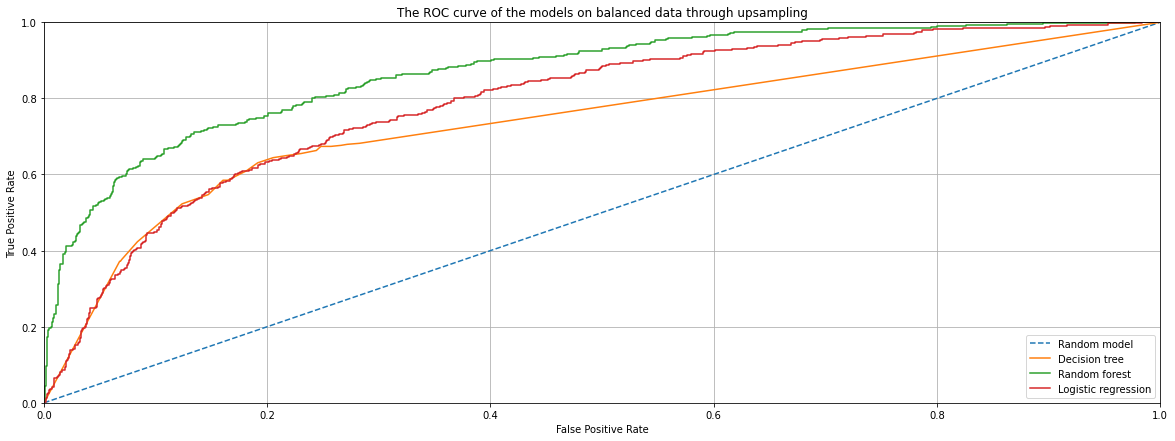

In [77]:
plt.figure()

plt.figure(figsize=(20,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_dtc_us,tpr_dtc_us)
plt.plot(fpr_rfc_us,tpr_rfc_us)
plt.plot(fpr_lr_us,tpr_lr_us)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The ROC curve of the models on balanced data through upsampling')
plt.legend(('Random model','Decision tree','Random forest','Logistic regression'),
           loc = 'lower right') 
plt.grid(True)
plt.show()

Conclusion: 

From the graph, we can see that the Random Forest model leads. In further work, we will use the Random Forest model for prediction.

Comparison of metrics of the Random Forest model:

|Metric|RF Unbalanced Data|RF Balanced with class_weight|RF Balanced with DownSampling|RF Balanced with Upsampling|
|:-|:-:|:-:|:-:|:-:|
|Accuracy |0,8696|0,8421|0,5759|0,83|
|Precision|0,8131|0,5981|0,3179|0,5665|
|Recall   |0,469|0,69|0,9407|0,7116|
|F1       |0,5949|0,6408|0,4752|0,6308|
|AUC-ROC  |0,8811|0,8749|0,8601|0,8688|


### We assess the best model.

We visualize the AUC-ROC through a graph of the area by the random forest model.

<Figure size 432x288 with 0 Axes>

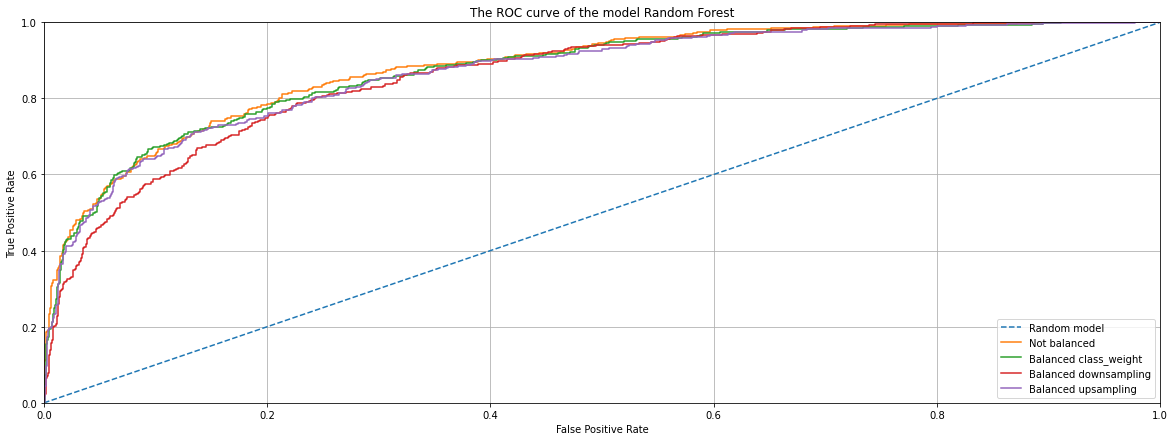

In [78]:
plt.figure()

plt.figure(figsize=(20,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_rfc_nb,tpr_rfc_nb)
plt.plot(fpr_rfc_cw,tpr_rfc_cw)
plt.plot(fpr_rfc_ds,tpr_rfc_ds)
plt.plot(fpr_rfc_us,tpr_rfc_us)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The ROC curve of the model Random Forest')
plt.legend(('Random model','Not balanced','Balanced class_weight','Balanced downsampling','Balanced upsampling'),
           loc = 'lower right') 
plt.grid(True)
plt.show()

Conclusion: 

From the graph, we can see that data balancing through downsampling has a negative effect on the model compared to the unbalanced data. Based on the metrics, the model with data balancing through class_weight has the highest F1 score of 0.6408, followed by the model with data balancing through upsampling with an F1 score of 0.6308, and the model with unbalanced data with an F1 score of 0.5949 in third place.

## 4. Testing models.

Let's combine the training and validation samples.

In [79]:
features_train = pd.concat([features_train, features_valid])
target_train = pd.concat([target_train, target_valid])

We will train a Random Forest model on the combined training sample with not balanced data and look at the metrics on the test sample.

In [80]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 300, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 100)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50)]
bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rs = RandomizedSearchCV(model_rfc, 
                        param_dist, 
                        random_state=12345)

rs.fit(features_train, target_train)

best_model_rfc = RandomForestClassifier(random_state=12345, 
                                        **rs.best_params_)

best_model_rfc.fit(features_train, target_train)

prediction_rfc = pd.Series(best_model_rfc.predict(features_test))
probabilities_test = best_model_rfc.predict_proba(features_test)[:, 1]
fpr_rfc_t_nb, tpr_rfc_t_nb, thresholds = roc_curve(target_test, probabilities_test)

In [81]:
print('Optimal combination of hyperparameters:',rs.best_params_)
print('Accuracy', round(accuracy_score(target_test, prediction_rfc),4))
print('Precision', round(precision_score(target_test, prediction_rfc),4))
print('Recall', round(recall_score(target_test, prediction_rfc),4))
print('F1', round(f1_score(target_test, prediction_rfc),4))
print('AUC-ROC', round(roc_auc_score(target_test, probabilities_test),4))

Optimal combination of hyperparameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_depth': 51, 'bootstrap': False}
Accuracy 0.8648
Precision 0.7962
Recall 0.4528
F1 0.5773
AUC-ROC 0.8564


We will train a Random Forest model on the combined training sample with data balancing through class_weight and look at the metrics on the test sample.

In [82]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 300)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 100)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50)]
bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rs = RandomizedSearchCV(model_rfc, 
                        param_dist, 
                        random_state=12345)

rs.fit(features_train, target_train)

best_model_rfc = RandomForestClassifier(random_state=12345, 
                                        class_weight='balanced', 
                                        **rs.best_params_)

best_model_rfc.fit(features_train, target_train)

prediction_rfc = pd.Series(best_model_rfc.predict(features_test))
probabilities_test = best_model_rfc.predict_proba(features_test)[:, 1]
fpr_rfc_t_cw, tpr_rfc_t_cw, thresholds = roc_curve(target_test, probabilities_test)

In [83]:
print('Optimal combination of hyperparameters:',rs.best_params_)
print('Accuracy', round(accuracy_score(target_test, prediction_rfc),4))
print('Precision', round(precision_score(target_test, prediction_rfc),4))
print('Recall', round(recall_score(target_test, prediction_rfc),4))
print('F1', round(f1_score(target_test, prediction_rfc),4))
print('AUC-ROC', round(roc_auc_score(target_test, probabilities_test),4))

Optimal combination of hyperparameters: {'n_estimators': 251, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 97, 'bootstrap': False}
Accuracy 0.8312
Precision 0.578
Recall 0.6388
F1 0.6069
AUC-ROC 0.8515


We will train a Random Forest model on the combined training sample with data balancing through upsampling and look at the metrics on the test sample.

In [84]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 300)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 100)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50)]
bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rs = RandomizedSearchCV(model_rfc, 
                        param_dist, 
                        random_state=12345)

rs.fit(features_upsampled, target_upsampled)

best_model_rfc = RandomForestClassifier(random_state=12345, 
                                        **rs.best_params_)

best_model_rfc.fit(features_upsampled, target_upsampled)

prediction_rfc = pd.Series(best_model_rfc.predict(features_test))
probabilities_test = best_model_rfc.predict_proba(features_test)[:, 1]
fpr_rfc_t_us, tpr_rfc_t_us, thresholds = roc_curve(target_test, probabilities_test)

In [85]:
print('Optimal combination of hyperparameters:',rs.best_params_)
print('Accuracy', round(accuracy_score(target_test, prediction_rfc),4))
print('Precision', round(precision_score(target_test, prediction_rfc),4))
print('Recall', round(recall_score(target_test, prediction_rfc),4))
print('F1', round(f1_score(target_test, prediction_rfc),4))
print('AUC-ROC', round(roc_auc_score(target_test, probabilities_test),4))

Optimal combination of hyperparameters: {'n_estimators': 251, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 97, 'bootstrap': False}
Accuracy 0.8268
Precision 0.5657
Recall 0.6496
F1 0.6048
AUC-ROC 0.8493


The metrics of the Random Forest model on the most promising data balancing methods.

|Metric|Not balanced data|Balanced from class_weight|Balanced from upsampling|
|:-|:-:|:-:|:-:|
|Accuracy |0,8648|0,8312|0,8268|
|Precision|0,7962|0,578|0,5657|
|Recall   |0,4528|0,6388|0,6496|
|F1       |0,5753|0,6069|0,6048|
|AUC-ROC  |0,8564|0,8515|0,8493|

before / after: 
* Before: the model before selecting the optimal combination of hyperparameters. 
* After: the model on the optimal combination of hyperparameters.

We will visualize the AUC-ROC through the area graph.

<Figure size 432x288 with 0 Axes>

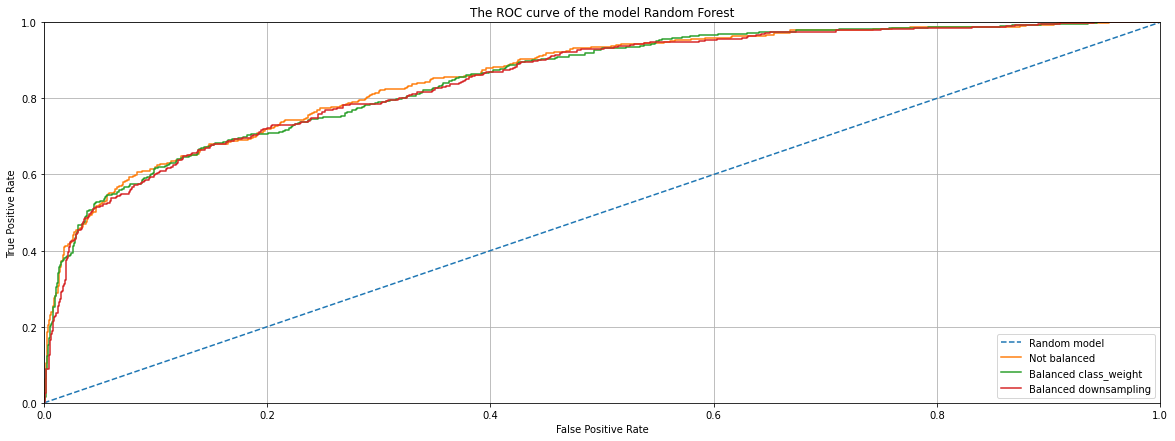

In [86]:
plt.figure()

plt.figure(figsize=(20,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_rfc_t_nb,tpr_rfc_t_nb)
plt.plot(fpr_rfc_t_cw,tpr_rfc_t_cw)
plt.plot(fpr_rfc_t_us,tpr_rfc_t_us)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The ROC curve of the model Random Forest')
plt.legend(('Random model','Not balanced','Balanced class_weight','Balanced downsampling','Balanced upsampling'),
           loc = 'lower right') 
plt.grid(True)
plt.show()

Conclusion: 

From the data metrics AUC-ROC and the ROC curve graph, we can see that the quality of the model for data balancing is close to each other and at a high level within 0.85. Of the 3 final data qualities, the model on the non-balanced data, balancing through class_weight and balancing through upsampling is the most attractive and recommended for further prediction of customer churn - the Random Forest model with hyperparameters n_estimators=251, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=97, bootstrap=False trained with data balancing through class_weight. The Random Forest model on the non-balanced data showed the F1 metric = 0.5753, which is below the threshold value of 0.59.

## 5. Overall conclusion:
* Upon reviewing the dataset, it was found that there were missing data in an amount of 9% of the total, and it was not possible to fill them with mean and median values - the data was removed.
* There were names in the column titles in upper case - all names were converted to lower case.
* No errors, anomalies, or duplicates were detected.
* Columns with personalized data were removed.
* Direct coding was used to convert categorical features to numerical.
* No strong dependence between the data that would negatively affect the accuracy of the models was detected.
* The dataframe was divided into training, validation, and test sets with centering and standardizing the data by scaling them.
* Decision tree, random forest, and logistic regression models were trained with the optimal combination of hyperparameters being selected using RandomizedSearchCV.
* The analysis of the obtained metrics was conducted, and the most qualitative and accurate model was the random forest.
* From the data, an imbalance of the data was identified, and the data was balanced using upsampling, downsampling, and class_weight. The most qualitative and accurate model for each data balancing method was the random forest.
* When comparing the quality and accuracy of the models, three most promising variants of the random forest model were chosen: the random forest with unbalanced data, the random forest with upsampling, and the leader - the random forest with data balancing through class_weight.
* Before testing, the training and validation sets were combined.
* The models were retrained on the combined training set with hyperparameters being selected using RandomizedSearchCV.
* Based on the analysis of metrics on the test sample, we can see that the metrics AUC-ROC and ROC curve quality of the model for data balancing are close to each other and at a high level within 0.85. 
* Of the three final models, the model on the unbalanced data, balancing through class_weight and balancing through upsampling is the most attractive and recommended for further prediction of customer churn in the bank - the random forest with hyperparameters n_estimators=251, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=97, bootstrap=False trained with data balancing through class_weight is the most qualitative and accurate for the given dataset.